**ENSF 611 - Final Project**  
**Team Members:**  
Destin Saba: 30249241  
Nathan de Oliveira: ####  
Rana El Sadig: ####  


# Introduction

In this machine learning project for ENSF 611, we will analyze the Stellar Classification Dataset from the Sloan Digital Sky Survey (SDSS). This dataset, available on Kaggle (https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data), contains information about various celestial objects, including stars, galaxies, and quasars. Our goal is to build a model that can accurately classify these objects based on their features. This project will involve data preprocessing, exploratory data analysis, model training, and evaluation.

In [57]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

# Load Dataset and Complete Exploratory Analysis

In [58]:
# Load the data
stars = pd.read_csv('star_classification.csv')

In [59]:
# Examine first few rows
stars.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [60]:
# Get info on columns and nulls
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There are no null values, and the only categorical data is the target vector (class).

In [61]:
space_colors = ["#1f1b4f", "#3b4cca", "#6d5acf", "#f3e9a7", "#f4b942", "#d9935d"]

<Axes: xlabel='class', ylabel='count'>

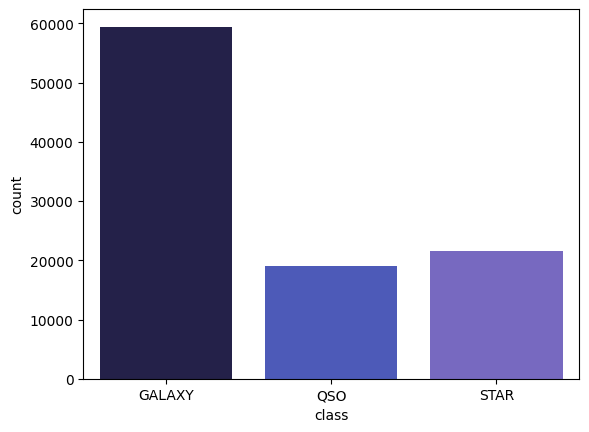

In [62]:
# Confirm possible classes by plotting distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=stars, x='class', palette=space_colors)

Alpha, also known as "Right Ascension" (RA), is the angular distance measured eastward along the equator.

Delta, also known as "Declination" (Dec), it’s the angular distance of an object north or south of the equator.

Knowing this, we can plot alpha vs. delta to paint a cool picture of where the celestial objects are in our sky.

<Axes: xlabel='alpha', ylabel='delta'>

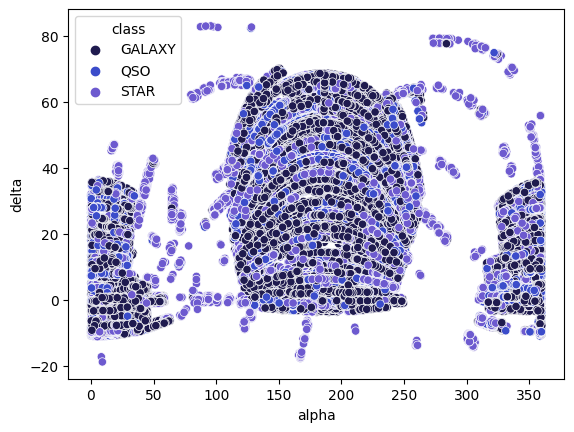

In [63]:
# Plot alpha  vs. delta
sns.scatterplot(data=stars, x='alpha', y='delta', hue='class', palette=space_colors)

# Feature Selection and Preprocessing

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
stars["class"] = labelencoder.fit_transform(stars["class"])
stars["class"].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

We will drop ID columns that do not provide useful information.

In [65]:
stars = stars.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID','fiber_ID'])

We will create a correlation matrix to work out the relationships between features.

<Axes: >

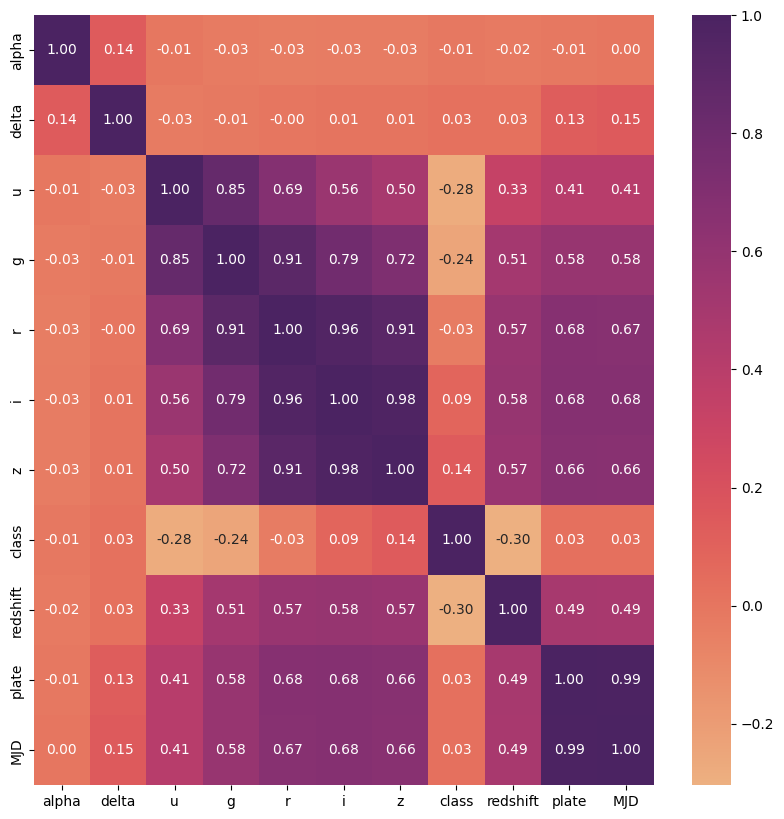

In [66]:
correlation_matrix = stars.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="flare", fmt=".2f")

In [67]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X = stars.drop(columns=['class'])
y = stars['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)